In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [6]:
train_data = pd.read_csv("./Data/train.csv")
train_data.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [7]:
test_data = pd.read_csv("./Data/test.csv")
test_data.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

## Change values to correlation analysis

In [8]:
# Change yes and no to 1 and 0
train_data['Gender'] = train_data['Gender'].replace({'Male': 1.0, 'Female': 0.0})
train_data['family_history_with_overweight'] = train_data['family_history_with_overweight'].replace({'yes': 1.0, 'no': 0.0})
train_data['FAVC'] = train_data['FAVC'].replace({'yes': 1.0, 'no': 0.0})
train_data['SMOKE'] = train_data['SMOKE'].replace({'yes': 1.0, 'no': 0.0})
train_data['SCC'] = train_data['SCC'].replace({'yes': 1.0, 'no': 0.0})


## Correlation analysis

<AxesSubplot:>

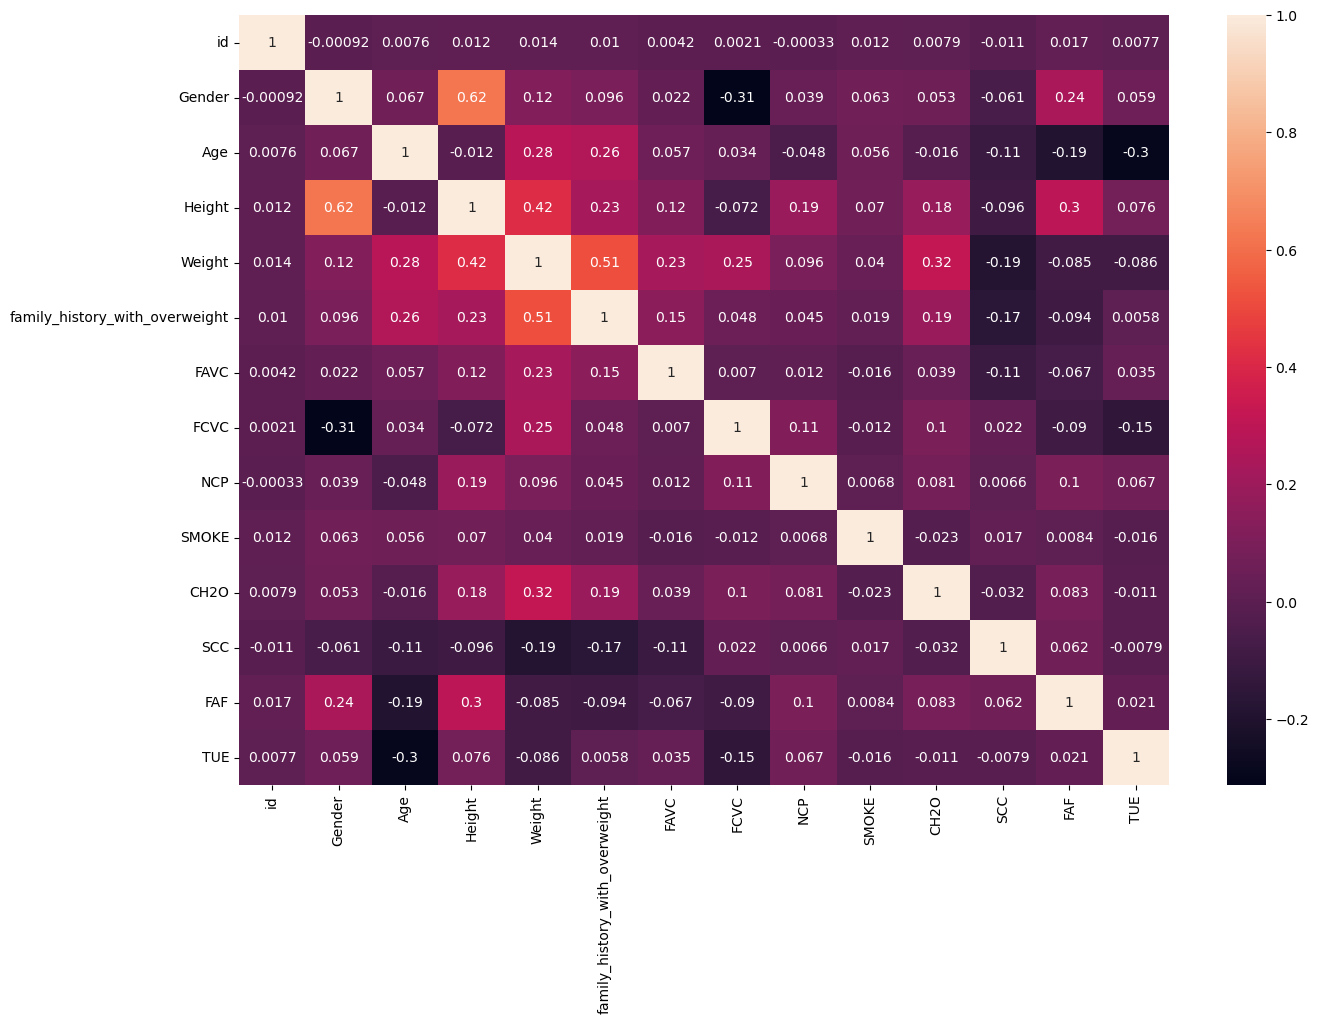

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.select_dtypes('number').corr(), annot=True)

In [10]:
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
         'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

order_seaborn = ['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I', 'Overweight_Level_II', 'Overweight_Level_I', 'Normal_Weight', 'Insufficient_Weight']

Text(0.5, 0, 'Gender (0 = Woman; 1 = Man)')

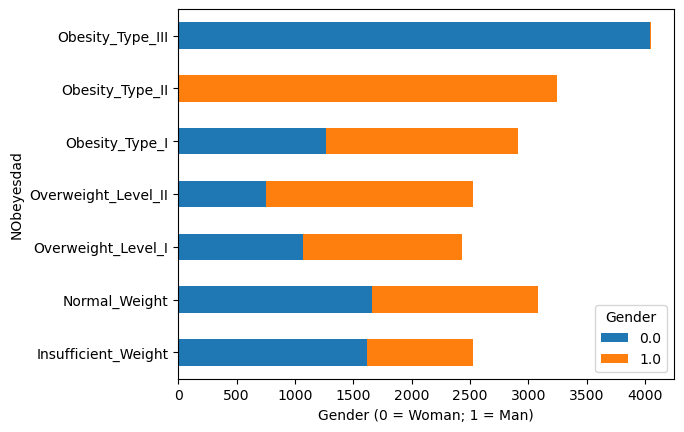

In [11]:
# Check SCC for each class
scc_counts = train_data.groupby('NObeyesdad')['Gender'].value_counts().unstack()

# Reorder rows
scc_counts = scc_counts.reindex(order)

# Check the distribution of the SCC in the dataset
scc_counts.plot(kind='barh', stacked=True)

plt.xlabel('Gender (0 = Woman; 1 = Man)')

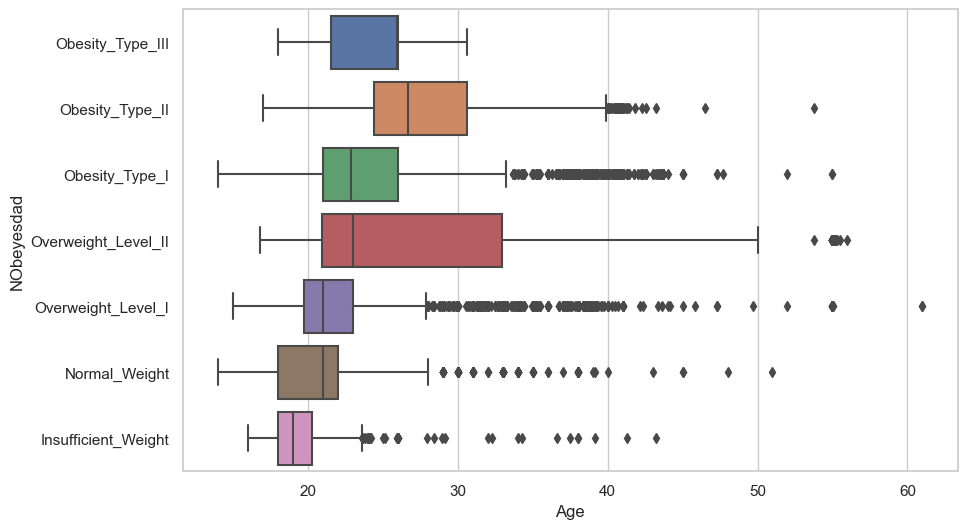

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='Age', orient='h', order=order_seaborn)

plt.xlabel('Age')
plt.ylabel('NObeyesdad')

plt.show()


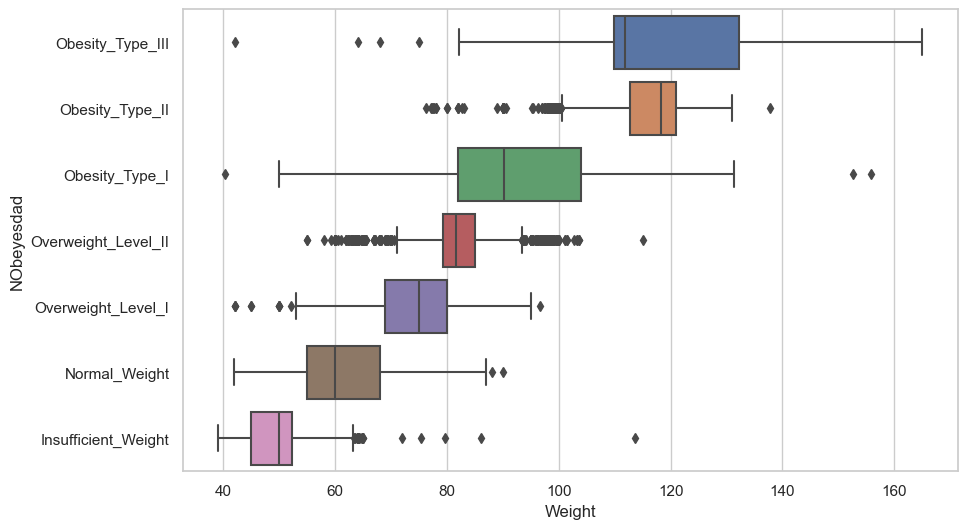

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='Weight', orient='h', order=order_seaborn)

plt.xlabel('Weight')
plt.ylabel('NObeyesdad')

plt.show()


Text(0.5, 0, 'family_history_with_overweight')

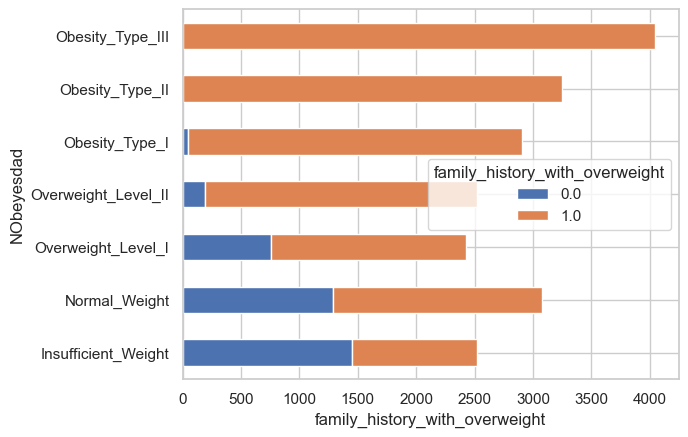

In [14]:
# Check SCC for each class
scc_counts = train_data.groupby('NObeyesdad')['family_history_with_overweight'].value_counts().unstack()

# Reorder rows
scc_counts = scc_counts.reindex(order)

# Check the distribution of the SCC in the dataset
scc_counts.plot(kind='barh', stacked=True)

plt.xlabel('family_history_with_overweight')

Text(0.5, 0, 'Consume high-calorie foods frequently')

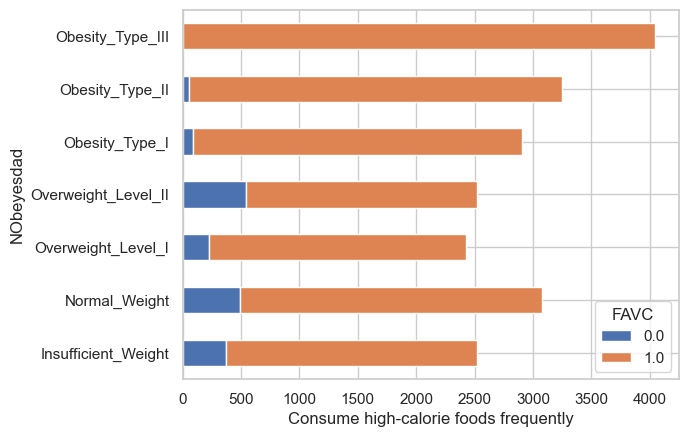

In [15]:
# Check SCC for each class
scc_counts = train_data.groupby('NObeyesdad')['FAVC'].value_counts().unstack()

# Reorder rows
scc_counts = scc_counts.reindex(order)

# Check the distribution of the SCC in the dataset
scc_counts.plot(kind='barh', stacked=True)

plt.xlabel('Consume high-calorie foods frequently')

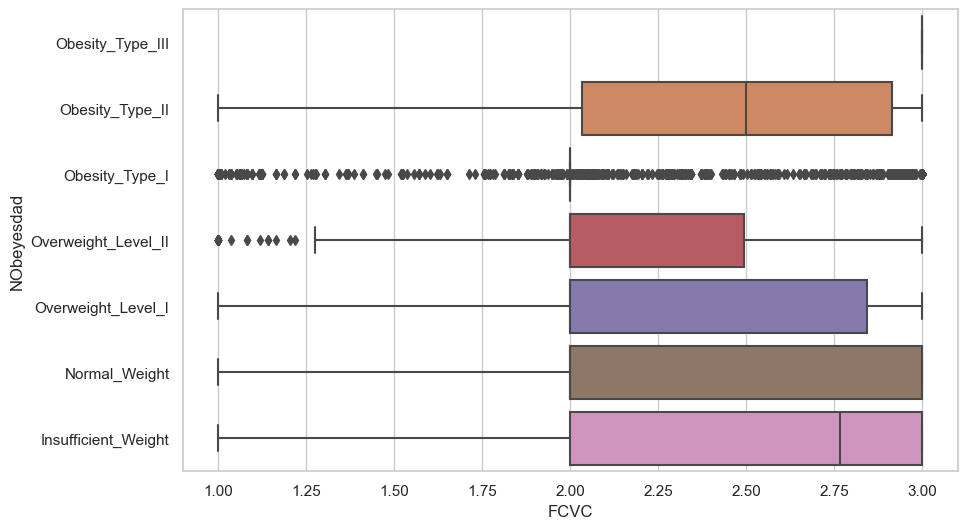

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='FCVC', orient='h', order=order_seaborn)

plt.xlabel('FCVC')
plt.ylabel('NObeyesdad')

plt.show()


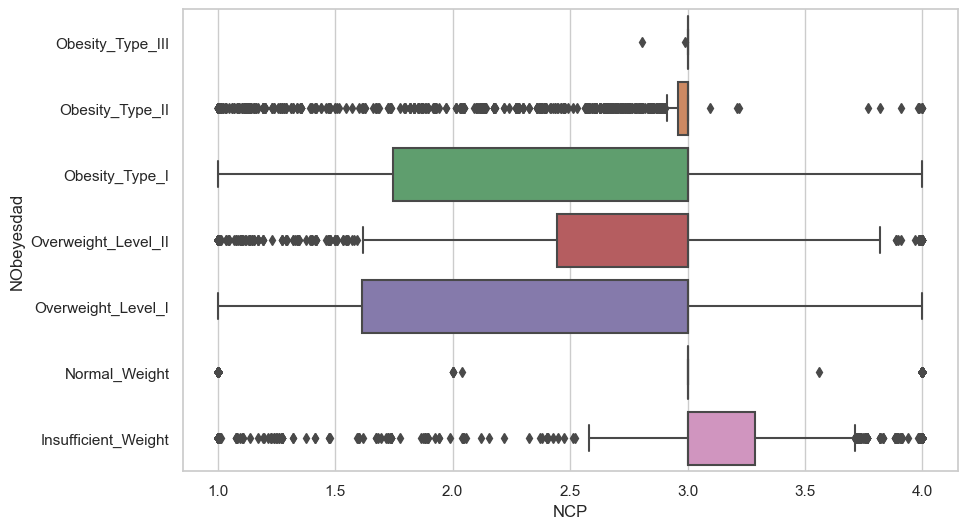

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='NCP', orient='h', order=order_seaborn)

plt.xlabel('NCP')
plt.ylabel('NObeyesdad')

plt.show()


Text(0.5, 0, 'Consumption of food between meals')

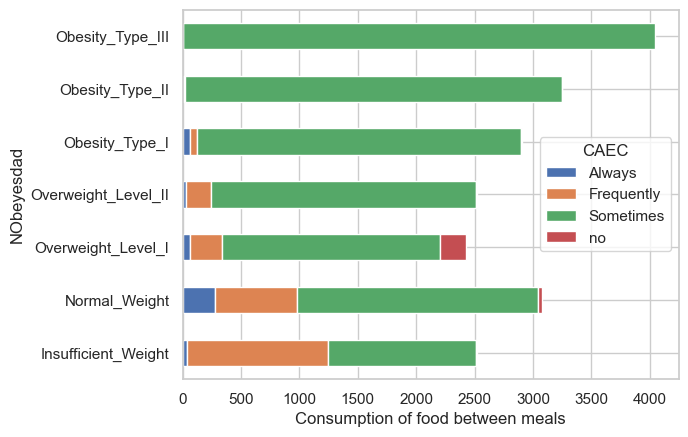

In [18]:
# Check CAEC for each class
caec_counts = train_data.groupby('NObeyesdad')['CAEC'].value_counts().unstack()

# Reorder rows
caec_counts = caec_counts.reindex(order)

# Check the distribution of the CAEC in the dataset
caec_counts.plot(kind='barh', stacked=True)

plt.xlabel('Consumption of food between meals')

Text(0.5, 0, 'Smoking habit')

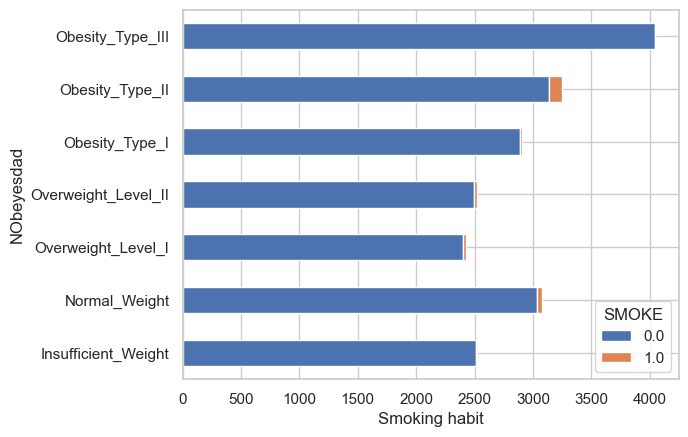

In [19]:
# Check SMOKE for each class
smoke_counts = train_data.groupby('NObeyesdad')['SMOKE'].value_counts().unstack()

# Reorder rows
smoke_counts = smoke_counts.reindex(order)

# Check the distribution of the SMOKE in the dataset
smoke_counts.plot(kind='barh', stacked=True)

plt.xlabel('Smoking habit')

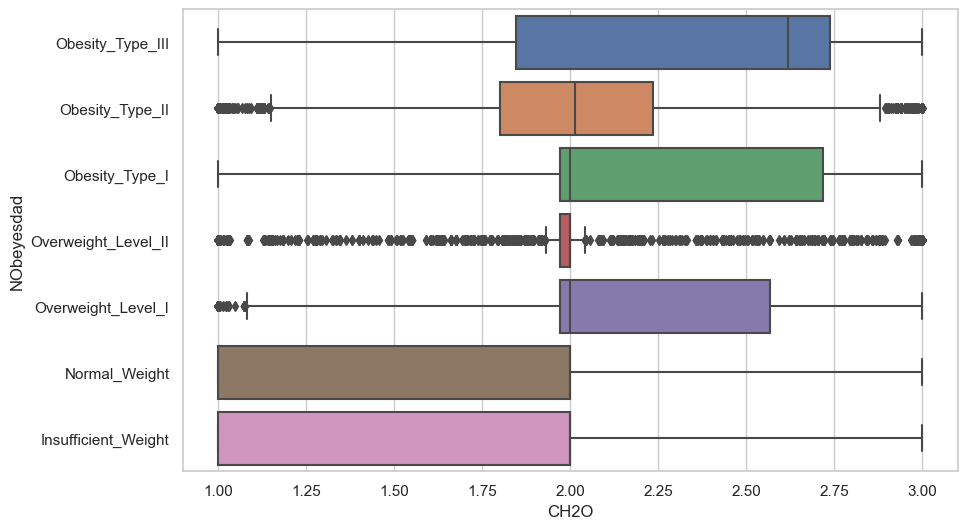

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='CH2O', orient='h', order=order_seaborn)

plt.xlabel('CH2O')
plt.ylabel('NObeyesdad')

plt.show()


Text(0.5, 0, 'Calories consumption monitoring')

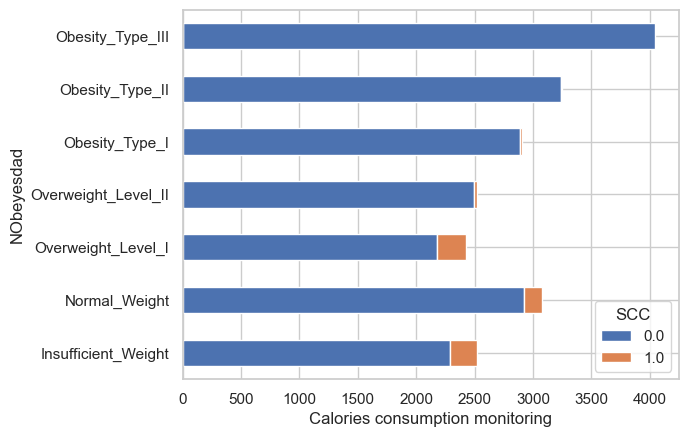

In [21]:
# Check SCC for each class
scc_counts = train_data.groupby('NObeyesdad')['SCC'].value_counts().unstack()

# Reorder rows
scc_counts = scc_counts.reindex(order)

# Check the distribution of the SCC in the dataset
scc_counts.plot(kind='barh', stacked=True)

plt.xlabel('Calories consumption monitoring')

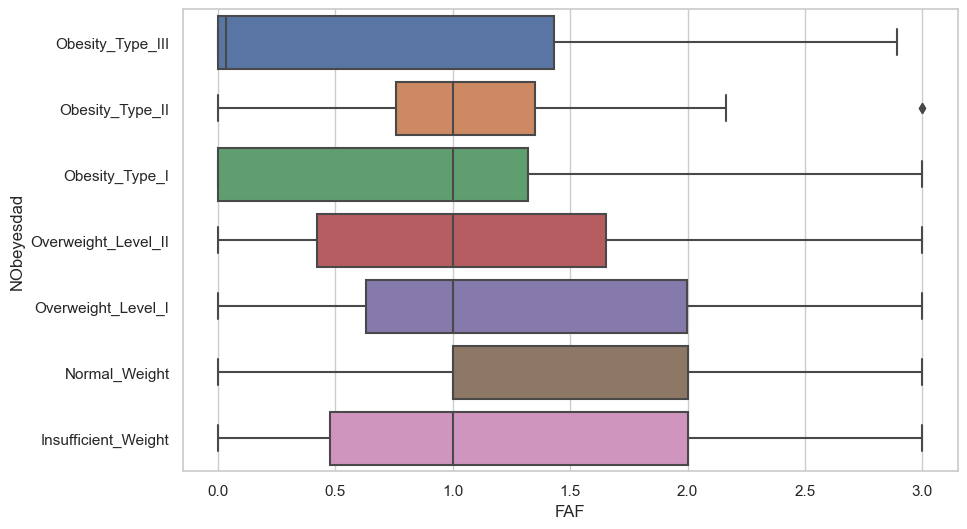

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='FAF', orient='h', order=order_seaborn)

plt.xlabel('FAF')
plt.ylabel('NObeyesdad')

plt.show()


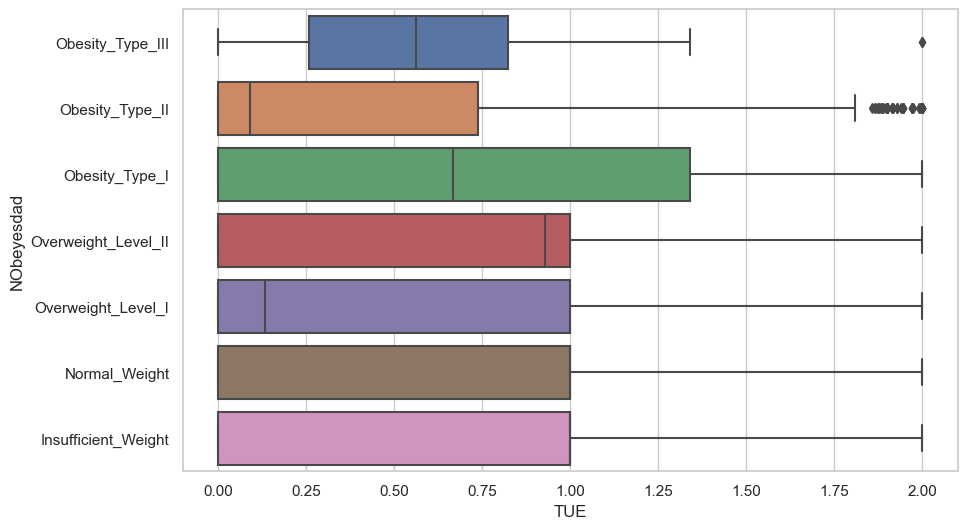

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=train_data, y='NObeyesdad', x='TUE', orient='h', order=order_seaborn)

plt.xlabel('TUE')
plt.ylabel('NObeyesdad')

plt.show()


Text(0.5, 0, 'Consumption of alcohol')

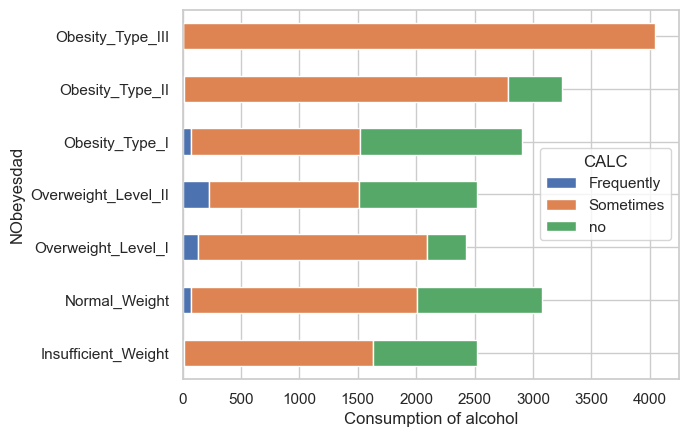

In [24]:
# Check CALC for each class
calc_counts = train_data.groupby('NObeyesdad')['CALC'].value_counts().unstack()

# Reorder rows
calc_counts = calc_counts.reindex(order)

# Check the distribution of the CALC in the dataset
calc_counts.plot(kind='barh', stacked=True)

plt.xlabel('Consumption of alcohol')

Text(0.5, 0, 'Transportation used')

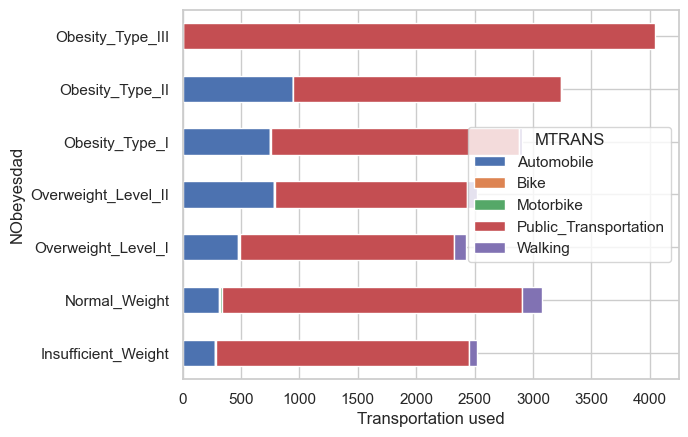

In [25]:
# Check MTRANS for each class
mtrans_counts = train_data.groupby('NObeyesdad')['MTRANS'].value_counts().unstack()

# Reorder rows
mtrans_counts = mtrans_counts.reindex(order)

# Check the distribution of the MTRANS in the dataset
mtrans_counts.plot(kind='barh', stacked=True)

plt.xlabel('Transportation used')

## Data distribuition

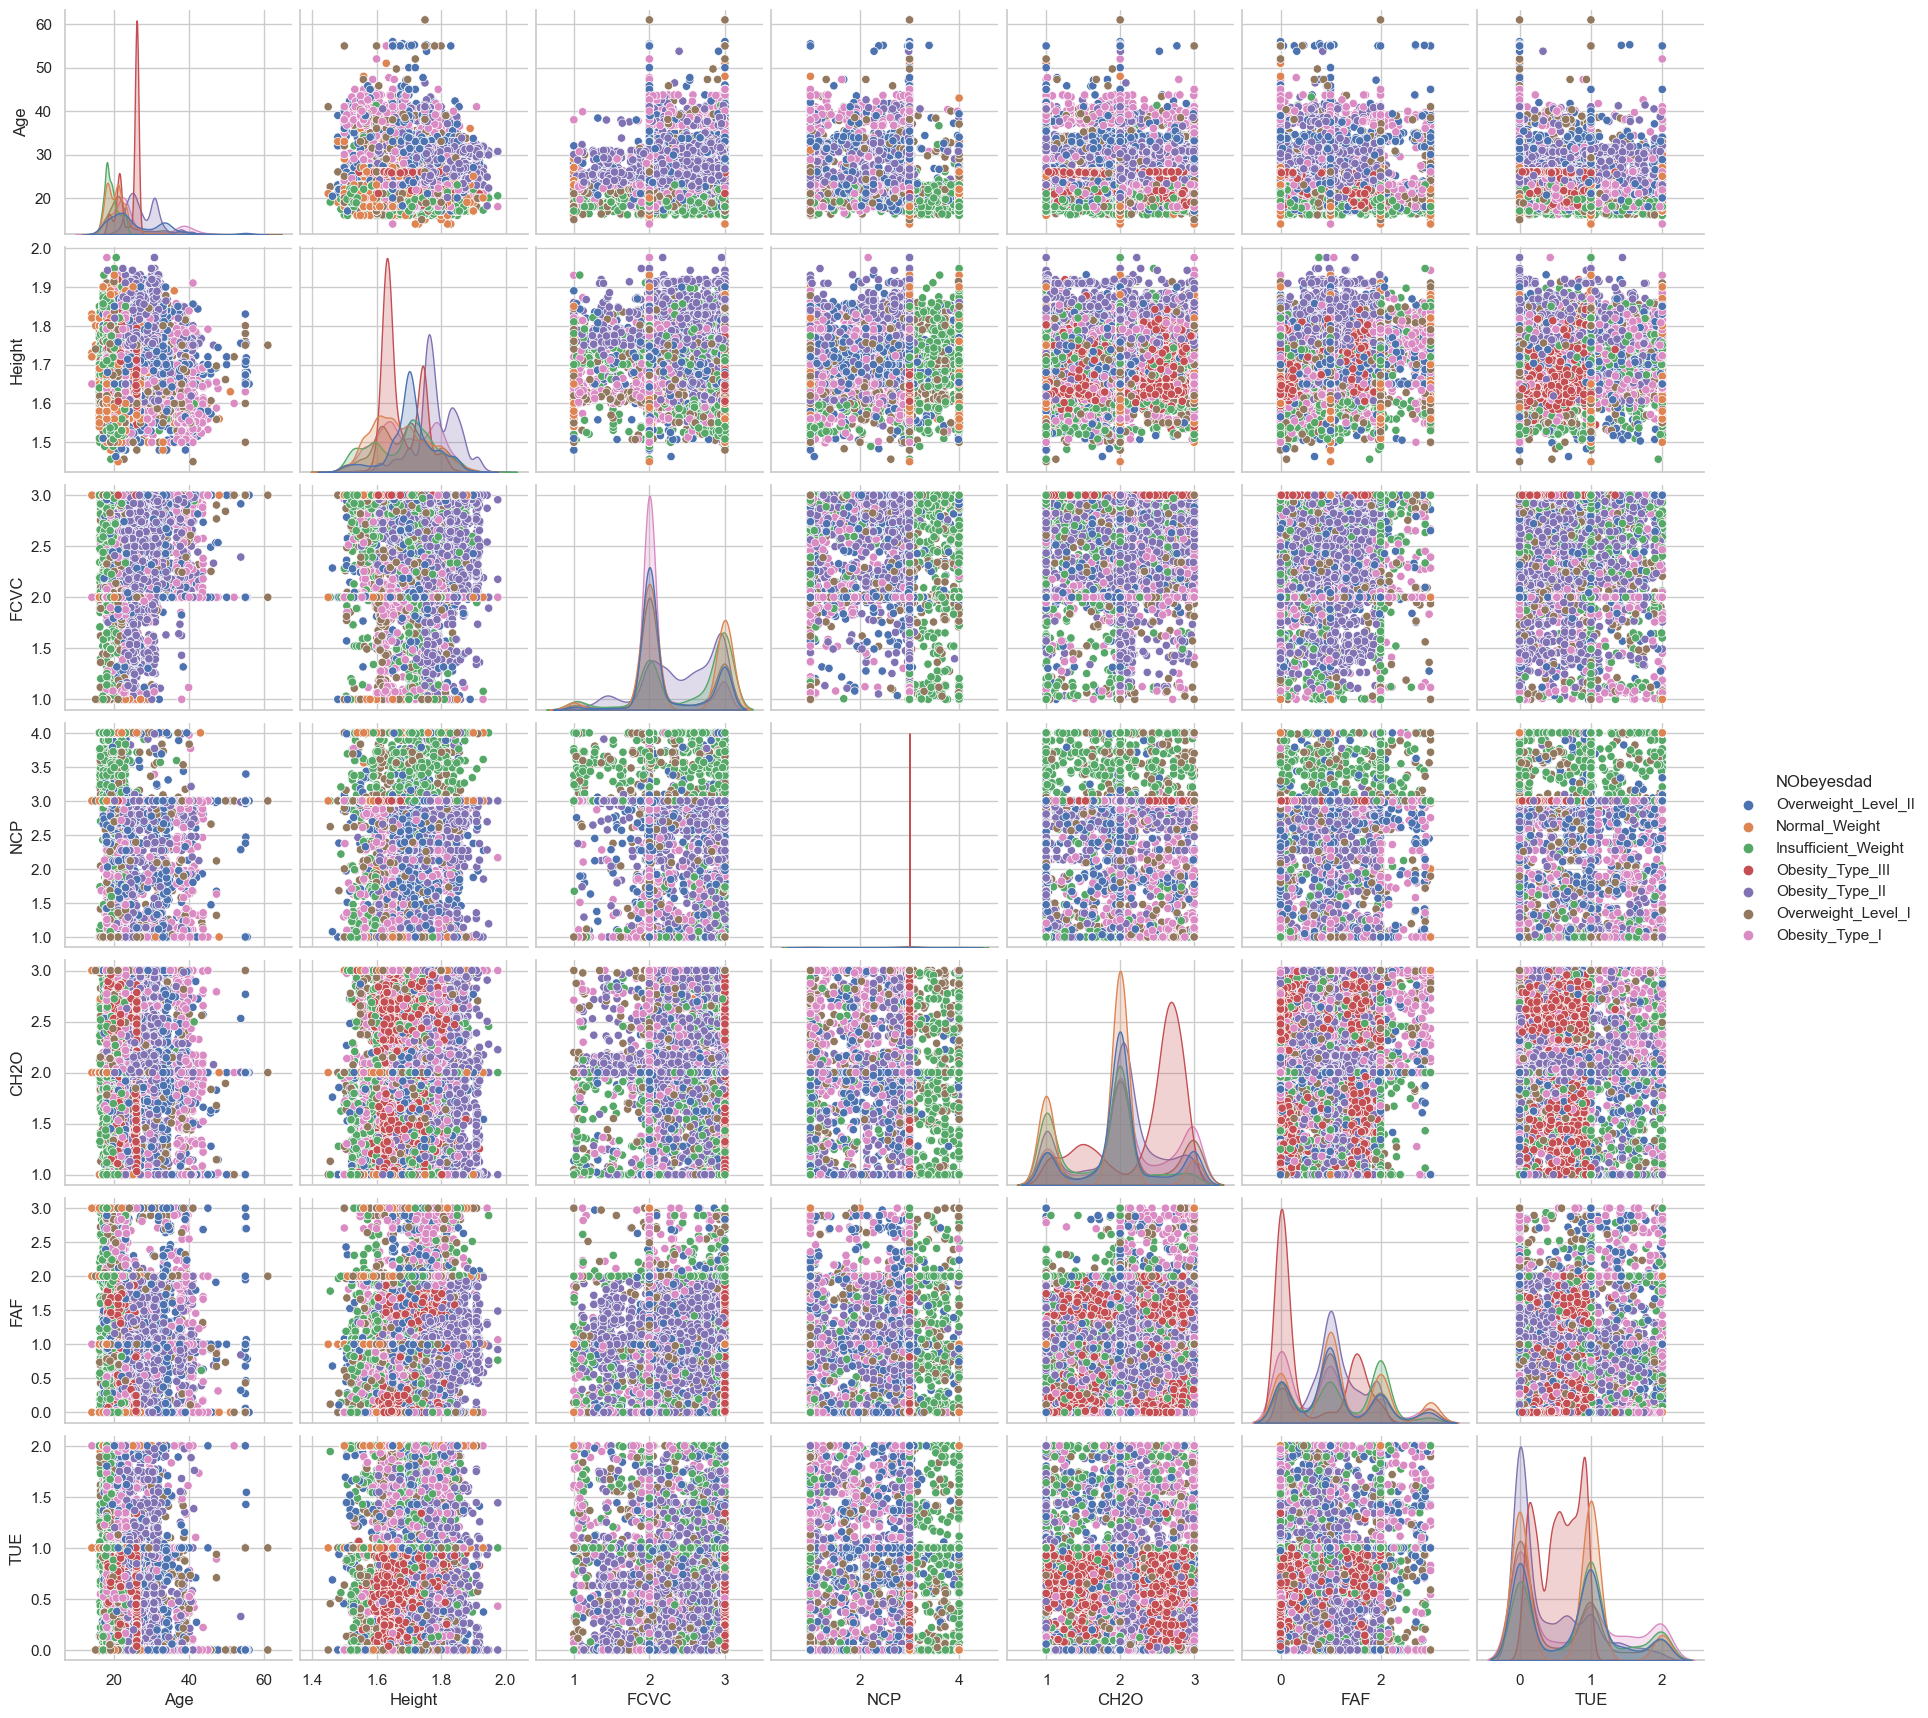

In [26]:
sns.pairplot(train_data[['Age','Height','FCVC','NCP','CAEC','CH2O','FAF','TUE','CALC','MTRANS','NObeyesdad']], hue = 'NObeyesdad')

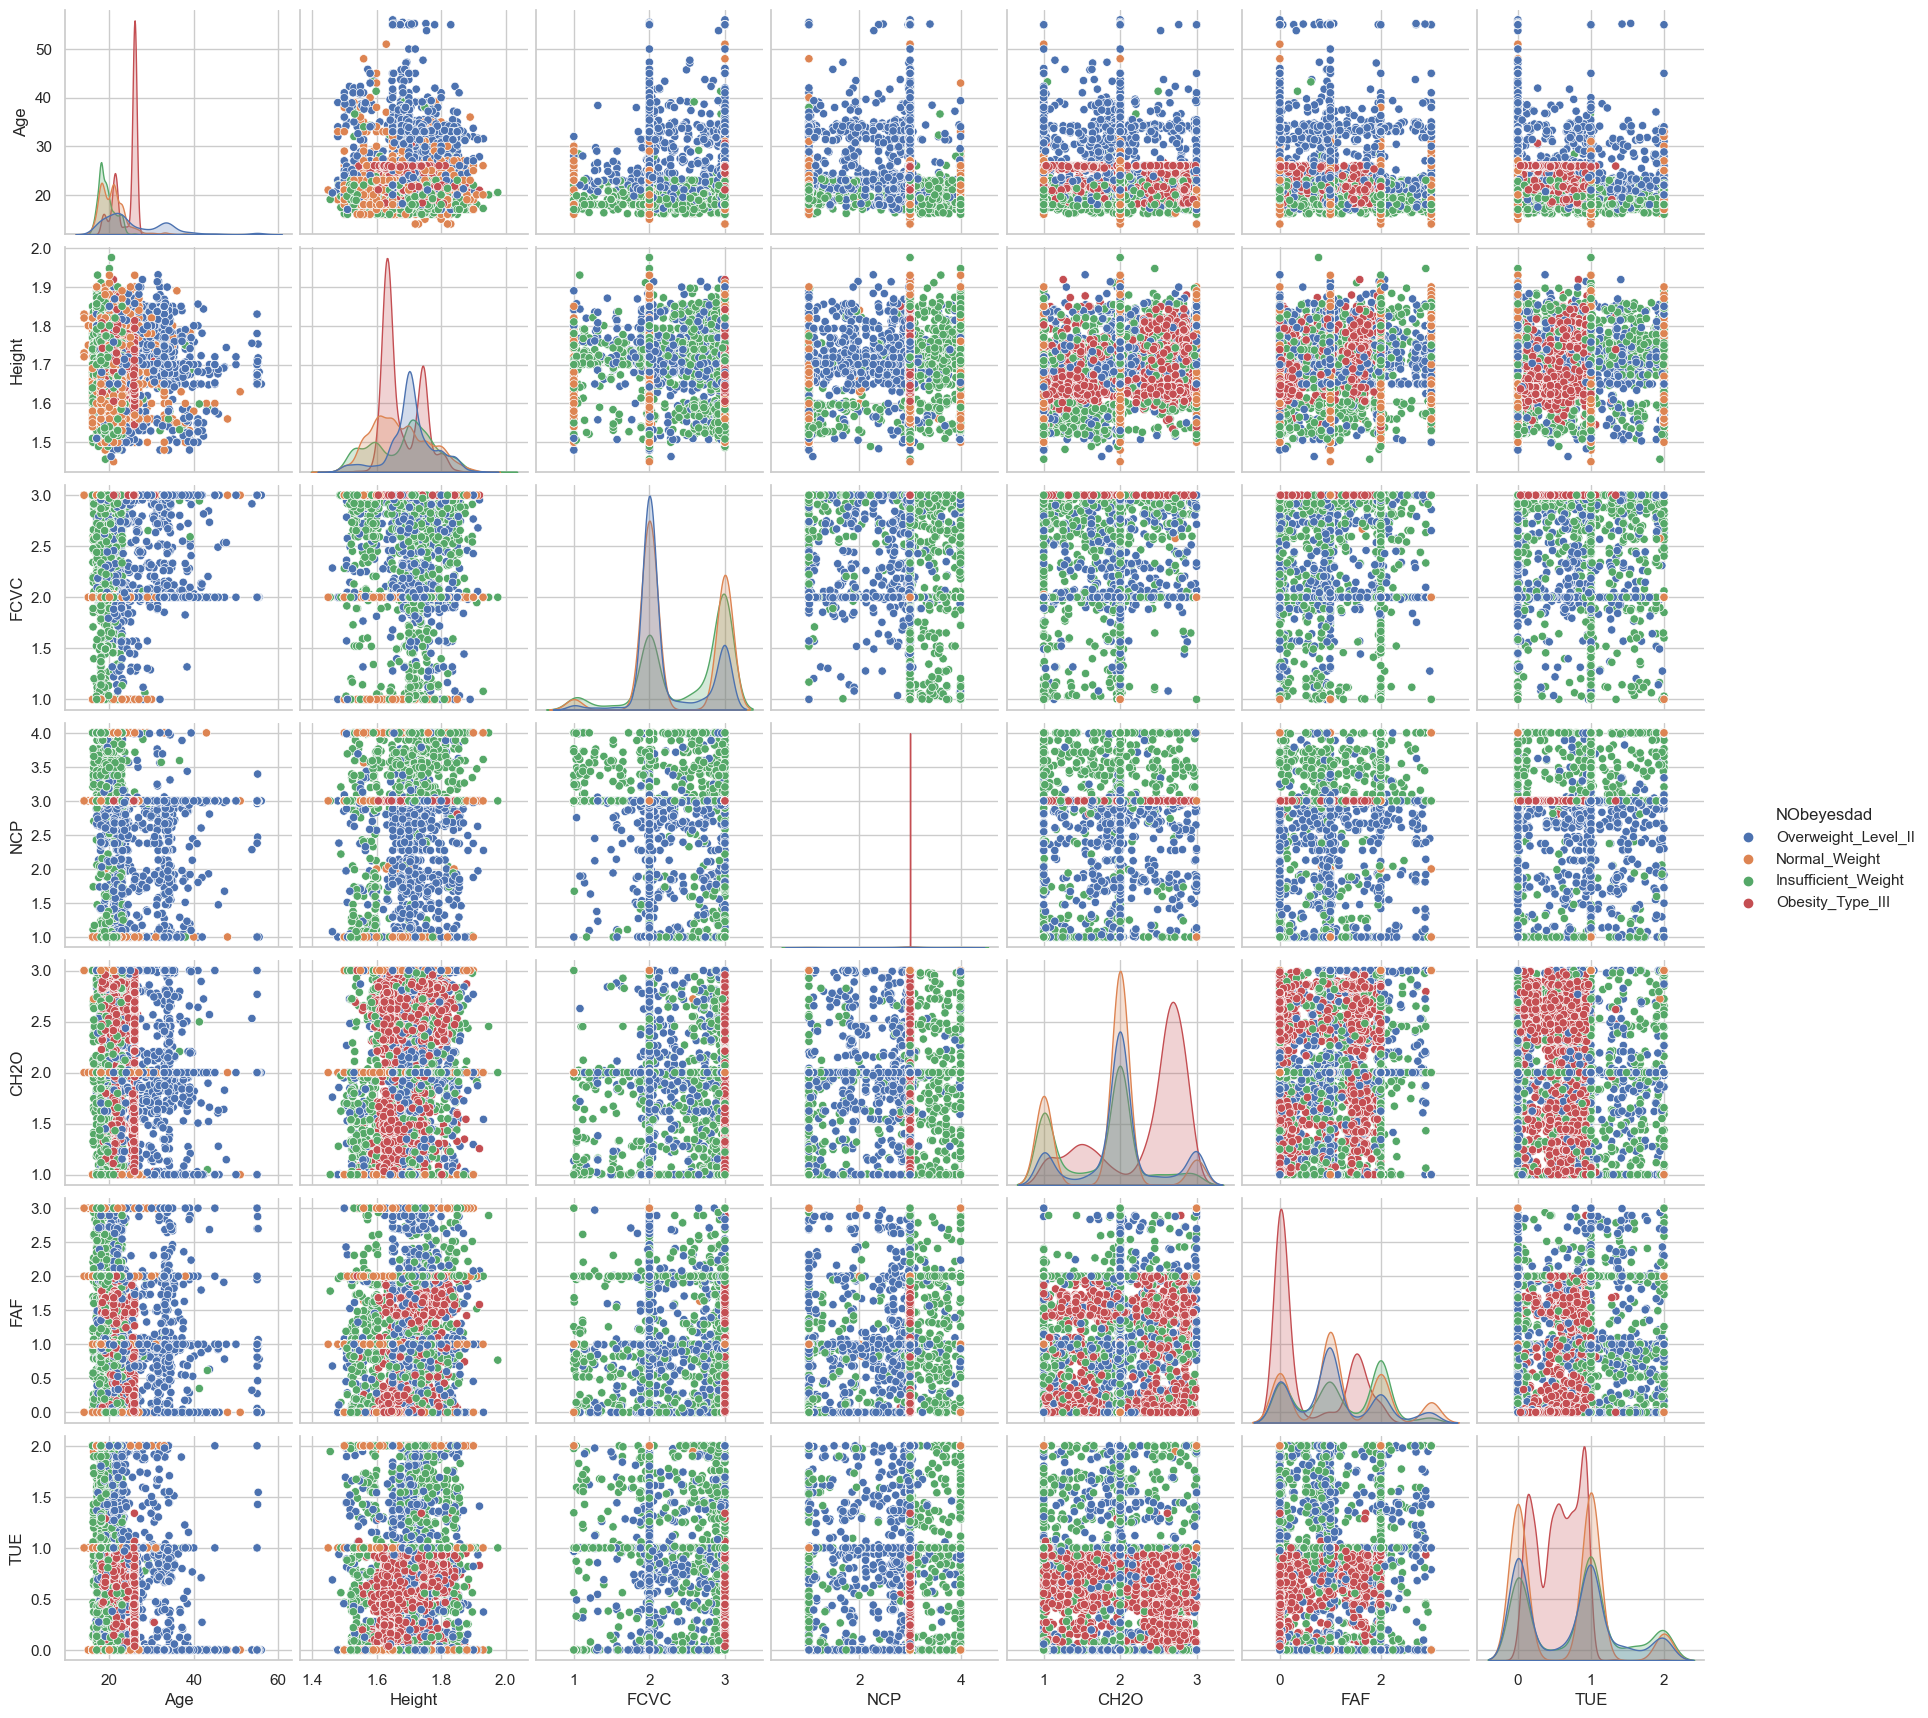

In [27]:
filtered_train_data = train_data[train_data['NObeyesdad'].isin(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_II', 'Obesity_Type_III'])]
sns.pairplot(filtered_train_data[['Age','Height','FCVC','NCP','CAEC','CH2O','FAF','TUE','CALC','MTRANS','NObeyesdad']], hue = 'NObeyesdad')


## Value count categorical data

In [28]:
train_data['NObeyesdad'].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

In [29]:
train_data['CAEC'].value_counts()

Sometimes     17529
Frequently     2472
Always          478
no              279
Name: CAEC, dtype: int64

In [30]:
train_data['CALC'].value_counts()

Sometimes     15066
no             5163
Frequently      529
Name: CALC, dtype: int64

In [31]:
train_data['MTRANS'].value_counts()

Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: MTRANS, dtype: int64

## Encode columns

In [32]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Defina as categorias como uma lista simples
categories = [['no', 'Sometimes', 'Frequently', 'Always'], ['no', 'Sometimes', 'Frequently','Always'], ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']]

# Inicialize o codificador ordinal
ord_enc = OrdinalEncoder(categories=categories)

# Aplique o codificador ordinal aos dados
ord_encoded_data = ord_enc.fit_transform(train_data[['CAEC', 'CALC', 'NObeyesdad']])

# Aplicar one hot encoding
one_hot_enc = OneHotEncoder()
one_hot_encoded_data = one_hot_enc.fit_transform(train_data[['MTRANS']])

# Convertendo a matriz esparsa para um DataFrame
one_hot_encoded_data = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_data)
one_hot_encoded_data.columns = one_hot_enc.get_feature_names()


In [33]:
# Concatenar os DataFrames
train_data = pd.concat([train_data, pd.DataFrame(ord_encoded_data, columns=['CAEC_Label', 'CALC_Label', 'NObeyesdad_Label']), one_hot_encoded_data], axis=1)

# Remover as colunas originais
train_data = train_data.drop(columns=['CAEC', 'CALC', 'MTRANS', 'NObeyesdad'])


# Correlation matrix

<AxesSubplot:>

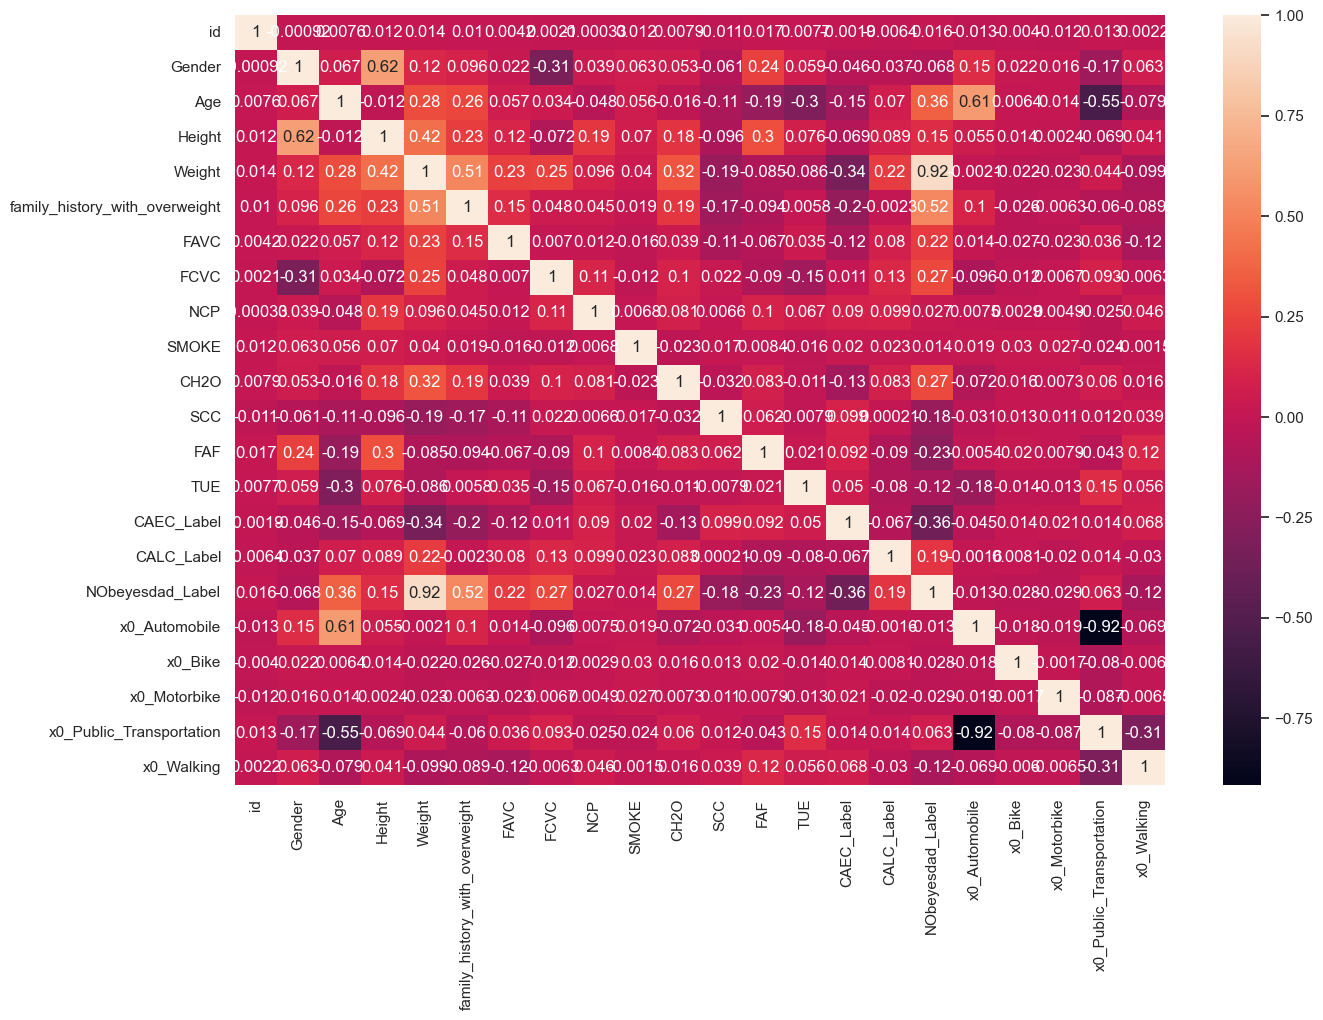

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.select_dtypes('number').corr(), annot=True)

## Variance analysis of the features

In [35]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01) # Example threshold
X_reduced = selector.fit_transform(train_data)

# Print removed columns
removed_columns = train_data.columns[~selector.get_support()]
print(removed_columns)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
reduced_train_data = train_data.iloc[:,cols]


Index(['Height', 'x0_Bike', 'x0_Motorbike'], dtype='object')


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


c:\Users\T-Gamer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\T-Gamer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\T-Gamer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

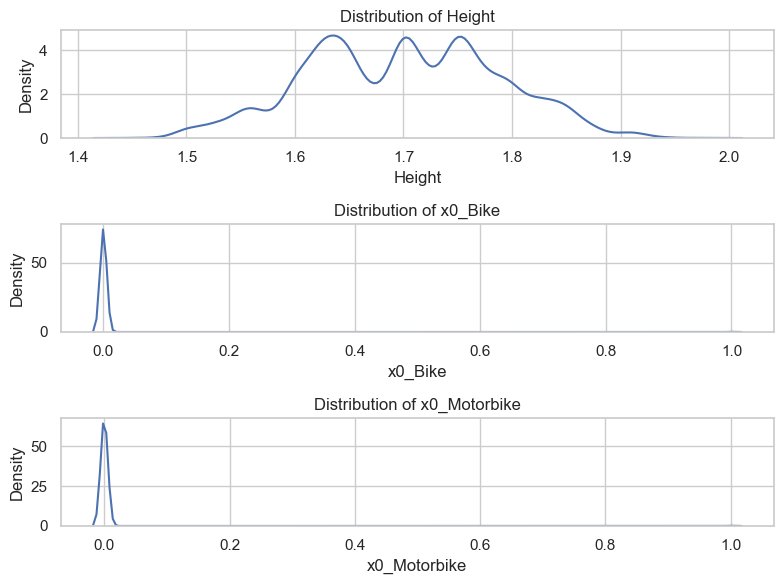

In [36]:
# Crie uma figura e eixos para os três subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 6))

# Plot do gráfico para Height
sns.distplot(train_data['Height'], hist=False, label='Height', ax=axes[0])

# Plot do gráfico para x0_Bike
sns.distplot(train_data['x0_Bike'], hist=False, label='x0_Bike', ax=axes[1])

# Plot do gráfico para x0_Motorbike
sns.distplot(train_data['x0_Motorbike'], hist=False, label='x0_Motorbike', ax=axes[2])

# Adicione rótulos e títulos
axes[0].set_title('Distribution of Height')
axes[1].set_title('Distribution of x0_Bike')
axes[2].set_title('Distribution of x0_Motorbike')

# Ajuste o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()


## PCA Analysis

c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [20] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [16] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [20] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[16]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
      PC                         feature   loading  type
0    PC1                             Age  0.434999  best
1    PC2        x0_Public_Transportation -0.441066  best
2    PC3                          Gender  0.497406  best
3    PC4                            

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 16 Principal Components explain [97.11%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

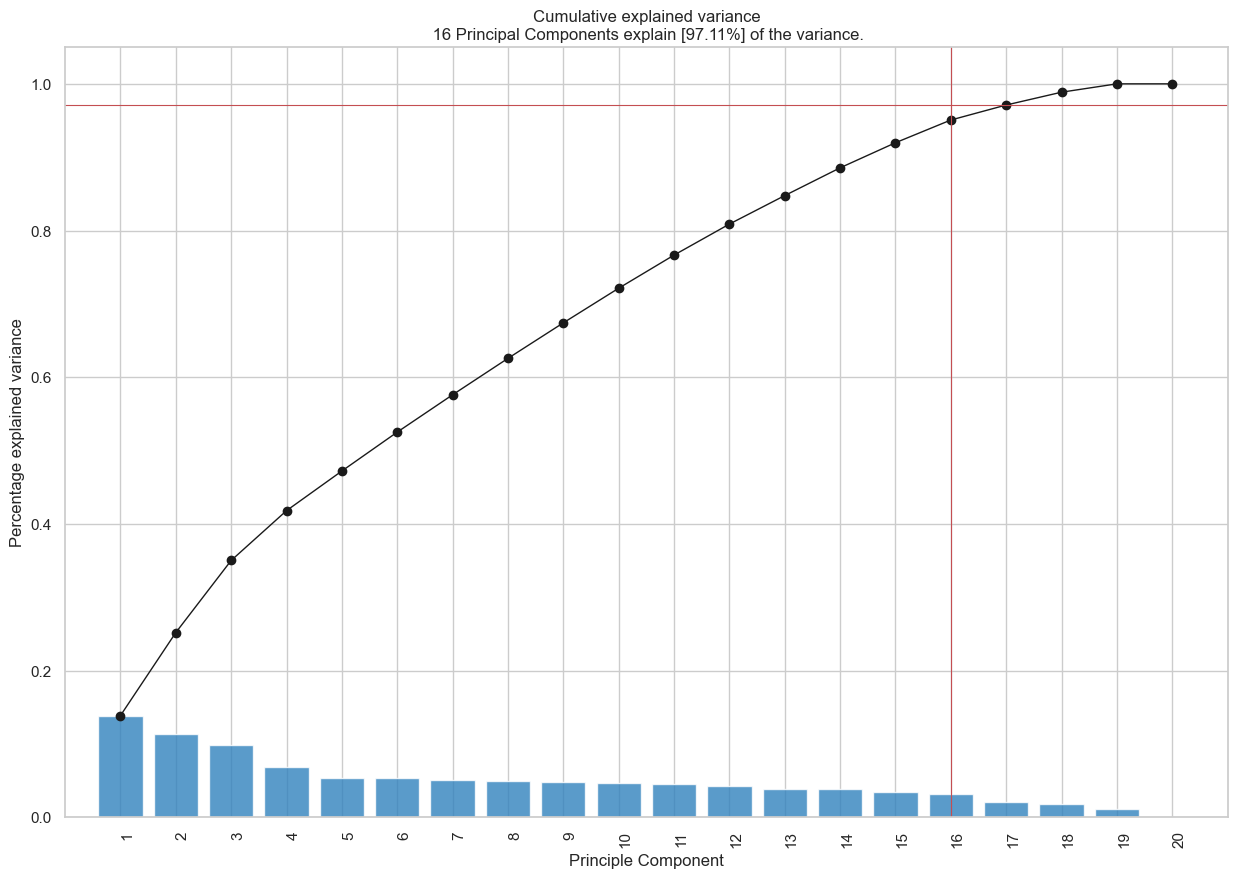

In [37]:
from pca import pca
from sklearn.preprocessing import StandardScaler


# Initialize
model = pca()

scaler = StandardScaler()
X_train = train_data.drop(columns=['id','NObeyesdad_Label'])


scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)

# Transform in dataframe
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)

# Fit transform
out = model.fit_transform(X_train_scale)

# Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

model.plot()


## Choosing model

### Only basic feature engineering 

In [38]:
# Import the required libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier



In [39]:

param_grid = {
    'Naive Bayes': {},
    'KNeighbors': {'n_neighbors': [3, 11,13,17,23], 'weights': ['uniform', 'distance']},
    'LogisticRegression': {'solver': ['newton-cg', 'lbfgs', 'liblinear']},
    'RandomForest': {'n_estimators': [100,300]},
    'SVC': {'kernel': ['rbf', 'linear', 'poly']},
    'GradientBoosting': {'n_estimators': [100,300]}
}

In [40]:

random_state = 2
classifiers = []

classifiers.append(('Naive Bayes', GaussianNB()))
classifiers.append(('KNeighbors', KNeighborsClassifier()))
classifiers.append(('LogisticRegression', LogisticRegression(random_state=random_state)))
classifiers.append(('RandomForest', RandomForestClassifier(random_state=random_state)))
classifiers.append(('SVC', SVC(random_state=random_state)))
classifiers.append(('GradientBoosting', GradientBoostingClassifier(random_state=random_state)))


X_train = train_data.drop(columns=['id','NObeyesdad_Label'])
y_train = train_data['NObeyesdad_Label']



results_dict = {'Classifier': [], 'Accuracy': [], 'Best Parameters': [], 'Time (s)': [], 'Model': []}

for name, classifier in classifiers:

    # If Name is SVC, scale the data
    if name == 'SVC':
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)

    # Inicie a contagem do tempo
    start_time = time.time()
    
    # KFold
    kfold = StratifiedKFold(n_splits=10)

    # Crie um GridSearchCV para o classificador atual
    grid_search = GridSearchCV(classifier, param_grid.get(name), scoring='accuracy', cv=kfold, n_jobs=-1, verbose=1)
    
    # Execute o GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Armazene os resultados no dicionário
    results_dict['Classifier'].append(name)
    results_dict['Accuracy'].append(grid_search.best_score_)
    results_dict['Best Parameters'].append(grid_search.best_params_)
    # Calcule o tempo de execução
    elapsed_time = time.time() - start_time
    results_dict['Time (s)'].append(elapsed_time)
    results_dict['Model'].append(grid_search.best_estimator_)
    



Fitting 10 folds for each of 1 candidates, totalling 10 fits


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Fitting 10 folds for each of 3 candidates, totalling 30 fits


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Fitting 10 folds for each of 2 candidates, totalling 20 fits


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


### With feature scaling

In [41]:


random_state = 2
classifiers = []

classifiers.append(('Naive Bayes', GaussianNB()))
classifiers.append(('KNeighbors', KNeighborsClassifier()))
classifiers.append(('LogisticRegression', LogisticRegression(random_state=random_state)))
classifiers.append(('RandomForest', RandomForestClassifier(random_state=random_state)))
classifiers.append(('SVC', SVC(random_state=random_state)))
classifiers.append(('GradientBoosting', GradientBoostingClassifier(random_state=random_state)))


# Create an instance of the scaler
scaler = StandardScaler()

X_train = train_data.drop(columns=['id','NObeyesdad_Label'])
y_train = train_data['NObeyesdad_Label']

scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)


for name, classifier in classifiers:
    # Inicie a contagem do tempo
    start_time = time.time()

    # KFold
    kfold = StratifiedKFold(n_splits=10)

    # Crie um GridSearchCV para o classificador atual
    grid_search = GridSearchCV(classifier, param_grid.get(name), scoring='accuracy', cv=kfold, n_jobs=-1, verbose=1)
    
    # Execute o GridSearchCV
    grid_search.fit(X_train_scale, y_train)
    
   # Armazene os resultados no dicionário
    results_dict['Classifier'].append(name + "_Feature_Scaling")
    results_dict['Accuracy'].append(grid_search.best_score_)
    results_dict['Best Parameters'].append(grid_search.best_params_)
    # Calcule o tempo de execução
    elapsed_time = time.time() - start_time
    results_dict['Time (s)'].append(elapsed_time)
    results_dict['Model'].append(grid_search.best_estimator_)
    



c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


### With feature scaling + joining columns

In [42]:
random_state = 2
classifiers = []

classifiers.append(('Naive Bayes', GaussianNB()))
classifiers.append(('KNeighbors', KNeighborsClassifier()))
classifiers.append(('LogisticRegression', LogisticRegression(random_state=random_state)))
classifiers.append(('RandomForest', RandomForestClassifier(random_state=random_state)))
classifiers.append(('SVC', SVC(random_state=random_state)))
classifiers.append(('GradientBoosting', GradientBoostingClassifier(random_state=random_state)))


# Create an instance of the scaler
scaler = StandardScaler()

X_train = train_data.drop(columns=['id','NObeyesdad_Label', 'x0_Automobile','x0_Bike' ,'x0_Motorbike', 'x0_Walking'])
y_train = train_data['NObeyesdad_Label']

scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)


for name, classifier in classifiers:
    # Inicie a contagem do tempo
    start_time = time.time()

    # KFold
    kfold = StratifiedKFold(n_splits=10)

    # Crie um GridSearchCV para o classificador atual
    grid_search = GridSearchCV(classifier, param_grid.get(name), scoring='accuracy', cv=kfold, n_jobs=-1, verbose=1)
    
    # Execute o GridSearchCV
    grid_search.fit(X_train_scale, y_train)
    
   # Armazene os resultados no dicionário
    results_dict['Classifier'].append(name + "_Feature_Scaling+JoiningColumns")
    results_dict['Accuracy'].append(grid_search.best_score_)
    results_dict['Best Parameters'].append(grid_search.best_params_)
    # Calcule o tempo de execução
    elapsed_time = time.time() - start_time
    results_dict['Time (s)'].append(elapsed_time)
    results_dict['Model'].append(grid_search.best_estimator_)
    



c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


### With feature scaling + PCA

In [43]:
from sklearn.preprocessing import StandardScaler

random_state = 2
classifiers = []

classifiers.append(('Naive Bayes', GaussianNB()))
classifiers.append(('KNeighbors', KNeighborsClassifier()))
classifiers.append(('LogisticRegression', LogisticRegression(random_state=random_state)))
classifiers.append(('RandomForest', RandomForestClassifier(random_state=random_state)))
classifiers.append(('SVC', SVC(random_state=random_state)))
classifiers.append(('GradientBoosting', GradientBoostingClassifier(random_state=random_state)))

# Create an instance of the scaler
scaler = StandardScaler()

X_train = train_data.drop(columns=['id','NObeyesdad_Label'])
y_train = train_data['NObeyesdad_Label']

scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)

# Create a PCA instance
pca = PCA(n_components=0.95)

# Apply PCA to the training data
X_train_pca = pca.fit_transform(X_train_scale)


for name, classifier in classifiers:
    # Inicie a contagem do tempo
    start_time = time.time()
    
    # KFold
    kfold = StratifiedKFold(n_splits=10)

    # Crie um GridSearchCV para o classificador atual
    grid_search = GridSearchCV(classifier, param_grid.get(name), scoring='accuracy', cv=kfold, n_jobs=-1, verbose=1)
    
    # Execute o GridSearchCV
    grid_search.fit(X_train_pca, y_train)
    
    # Armazene os resultados no dicionário
    results_dict['Classifier'].append(name + "_Feature_Scaling+PCA_" + str(X_train_pca.shape[1]))
    results_dict['Accuracy'].append(grid_search.best_score_)
    results_dict['Best Parameters'].append(grid_search.best_params_)
    elapsed_time = time.time() - start_time
    results_dict['Time (s)'].append(elapsed_time)
    results_dict['Model'].append(grid_search.best_estimator_)





c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [44]:
df = pd.DataFrame(results_dict)
df

Classifier  Accuracy  \
0                                         Naive Bayes  0.621062   
1                                          KNeighbors  0.848493   
2                                  LogisticRegression  0.845747   
3                                        RandomForest  0.898112   
4                                                 SVC  0.865932   
5                                    GradientBoosting  0.907072   
6                         Naive Bayes_Feature_Scaling  0.620484   
7                          KNeighbors_Feature_Scaling  0.753974   
8                  LogisticRegression_Feature_Scaling  0.859284   
9                        RandomForest_Feature_Scaling  0.898449   
10                                SVC_Feature_Scaling  0.865932   
11                   GradientBoosting_Feature_Scaling  0.907072   
12         Naive Bayes_Feature_Scaling+JoiningColumns  0.661962   
13          KNeighbors_Feature_Scaling+JoiningColumns  0.755949   
14  LogisticRegression_Feature_Scaling+JoiningColumns  0.859332   
15        RandomForest_Feature_Scaling+JoiningColumns  0.900858   
16                 SVC_Feature_Scaling+JoiningColumns  0.865835   
17    GradientBoosting_Feature_Scaling+JoiningColumns  0.906542   
18                 Naive Bayes_Feature_Scaling+PCA_16  0.569852   
19                  KNeighbors_Feature_Scaling+PCA_16  0.718999   
20          LogisticRegression_Feature_Scaling+PCA_16  0.675980   
21                RandomForest_Feature_Scaling+PCA_16  0.740196   
22                         SVC_Feature_Scaling+PCA_16  0.759129   
23            GradientBoosting_Feature_Scaling+PCA_16  0.728972   

                               Best Parameters    Time (s)  \
0                                           {}    4.420438   
1    {'n_neighbors': 11, 'weights': 'uniform'}   38.743417   
2                      {'solver': 'newton-cg'}  118.980834   
3                        {'n_estimators': 300}   23.589968   
4                         {'kernel': 'linear'}   65.500152   
5                        {'n_estimators': 300}  273.973053   
6                                           {}    0.184055   
7   {'n_neighbors': 11, 'weights': 'distance'}   32.660130   
8                          {'solver': 'lbfgs'}   17.650190   
9                        {'n_estimators': 300}   22.517067   
10                        {'kernel': 'linear'}   66.299903   
11                       {'n_estimators': 300}  281.160931   
12                                          {}    0.204030   
13  {'n_neighbors': 13, 'weights': 'distance'}   32.524199   
14                         {'solver': 'lbfgs'}   15.659674   
15                       {'n_estimators': 300}   23.484779   
16                        {'kernel': 'linear'}   51.261576   
17                       {'n_estimators': 300}  245.349279   
18                                          {}    0.197001   
19  {'n_neighbors': 13, 'weights': 'distance'}   32.009857   
20                         {'solver': 'lbfgs'}   17.910941   
21                       {'n_estimators': 300}   77.908995   
22                           {'kernel': 'rbf'}   86.314905   
23                       {'n_estimators': 300}  782.101878   

                                                Model  
0                                        GaussianNB()  
1                KNeighborsClassifier(n_neighbors=11)  
2   LogisticRegression(random_state=2, solver='new...  
3   (DecisionTreeClassifier(max_features='auto', r...  
4                SVC(kernel='linear', random_state=2)  
5   ([DecisionTreeRegressor(criterion='friedman_ms...  
6                                        GaussianNB()  
7   KNeighborsClassifier(n_neighbors=11, weights='...  
8                  LogisticRegression(random_state=2)  
9   (DecisionTreeClassifier(max_features='auto', r...  
10               SVC(kernel='linear', random_state=2)  
11  ([DecisionTreeRegressor(criterion='friedman_ms...  
12                                       GaussianNB()  
13  KNeighborsClassifier(n_neigh

### - Gradient Boost, Random Forest and SVM are the best
### - PCA reduced accuracy too much
### - Feature scaling did the best job for Gradient Boost and SVM
### - Feature scaling + joining columns columns did the best job for Random Forest

## Hyperparameter tuning

In [45]:
param_grid = {
    'Naive Bayes': {},
    'RandomForest': {'n_estimators': [100,200,300], 'max_depth': [None], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 3, 10], 'max_features': ['sqrt', 'log2']},
    'SVC': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear',]},
    'GradientBoosting': {'n_estimators': [100,200,300], 'learning_rate': [0.1, 0.05, 0.01]}
}

### Feature Scaling 

In [46]:
random_state = 2
classifiers = []

classifiers.append(('Naive Bayes', GaussianNB()))
classifiers.append(('SVC', SVC(random_state=random_state)))
classifiers.append(('GradientBoosting', GradientBoostingClassifier(random_state=random_state)))

# Create an instance of the scaler
scaler = StandardScaler()

X_train = train_data.drop(columns=['id','NObeyesdad_Label'])
y_train = train_data['NObeyesdad_Label']

scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)


best_results = {'Classifier': [], 'Accuracy': [], 'Best Parameters': [], 'Time (s)': [], 'Model': []}


for name, classifier in classifiers:


    # Inicie a contagem do tempo
    start_time = time.time()

    # KFold
    kfold = StratifiedKFold(n_splits=10)

    # Crie um GridSearchCV para o classificador atual
    grid_search = GridSearchCV(classifier, param_grid.get(name), scoring='accuracy', cv=kfold, n_jobs=-1, verbose=3)

    # Execute o GridSearchCV
    grid_search.fit(X_train_scale, y_train)

    # Armazene os resultados no dicionário
    best_results['Classifier'].append(name)
    best_results['Accuracy'].append(grid_search.best_score_)
    best_results['Best Parameters'].append(grid_search.best_params_)
    # best_results o tempo de execução
    elapsed_time = time.time() - start_time
    best_results['Time (s)'].append(elapsed_time)
    best_results['Model'].append(grid_search.best_estimator_)


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits


### Feature Scaling + Joining Columns

In [47]:
random_state = 2


# Create an instance of the scaler
scaler = StandardScaler()

X_train = train_data.drop(columns=['id','NObeyesdad_Label', 'x0_Automobile','x0_Bike' ,'x0_Motorbike', 'x0_Walking'])
y_train = train_data['NObeyesdad_Label']

scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)

name = 'RandomForest'
classifier = RandomForestClassifier(random_state=random_state)

# Inicie a contagem do tempo
start_time = time.time()

# KFold
kfold = StratifiedKFold(n_splits=10)

# Crie um GridSearchCV para o classificador atual
grid_search = GridSearchCV(classifier, param_grid.get(name), scoring='accuracy', cv=kfold, n_jobs=-1, verbose=4)

# Execute o GridSearchCV
grid_search.fit(X_train_scale, y_train)

# Armazene os resultados no dicionário
best_results['Classifier'].append(name)
best_results['Accuracy'].append(grid_search.best_score_)
best_results['Best Parameters'].append(grid_search.best_params_)
# best_results o tempo de execução
elapsed_time = time.time() - start_time
best_results['Time (s)'].append(elapsed_time)
best_results['Model'].append(grid_search.best_estimator_)







c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [48]:
df = pd.DataFrame(best_results)
df

Classifier  Accuracy  \
0       Naive Bayes  0.620484   
1               SVC  0.866173   
2  GradientBoosting  0.907939   
3      RandomForest  0.902062   

                                     Best Parameters    Time (s)  \
0                                                 {}    0.217000   
1        {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}  187.564806   
2        {'learning_rate': 0.1, 'n_estimators': 200}  953.764103   
3  {'criterion': 'gini', 'max_depth': None, 'max_...  862.788821   

                                               Model  
0                                       GaussianNB()  
1  SVC(C=10, gamma=0.1, kernel='linear', random_s...  
2  ([DecisionTreeRegressor(criterion='friedman_ms...  
3  (DecisionTreeClassifier(max_features='sqrt', m...

## Predicting test data

### Only Gradient Boosting predict

In [49]:
# Change yes and no to 1 and 0
test_data['Gender'] = test_data['Gender'].replace({'Male': 1.0, 'Female': 0.0})
test_data['family_history_with_overweight'] = test_data['family_history_with_overweight'].replace({'yes': 1.0, 'no': 0.0})
test_data['FAVC'] = test_data['FAVC'].replace({'yes': 1.0, 'no': 0.0})
test_data['SMOKE'] = train_data['SMOKE'].replace({'yes': 1.0, 'no': 0.0})
test_data['SCC'] = test_data['SCC'].replace({'yes': 1.0, 'no': 0.0})


# Define the categories
categories = [['no', 'Sometimes', 'Frequently', 'Always'], ['no', 'Sometimes', 'Frequently','Always']]

# Apply the ordinal encoder to the data

ord_enc = OrdinalEncoder(categories=categories)
ord_encoded_data = ord_enc.fit_transform(test_data[['CAEC', 'CALC']])

# Apply one hot encoding
one_hot_enc = OneHotEncoder()
one_hot_encoded_data = one_hot_enc.fit_transform(test_data[['MTRANS']])

# Convert the sparse matrix to a DataFrame
one_hot_encoded_data = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_data)
one_hot_encoded_data.columns = one_hot_enc.get_feature_names()

# Concat the DataFrames
test_data = pd.concat([test_data, pd.DataFrame(ord_encoded_data, columns=['CAEC_Label', 'CALC_Label']), one_hot_encoded_data], axis=1)

# Remove the original columns
X_test = test_data.drop(columns=['CAEC', 'CALC', 'MTRANS', 'id'])

# Create an instance of the scaler
scaler = StandardScaler()

scaler.fit(X_test)
X_test_scale = scaler.transform(X_test)

model = best_results['Model'][2]

y_pred = model.predict(X_test_scale)



c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [50]:
# Convert 0 to 6 labels 
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.replace({0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'})

In [51]:
# Concatenate to all test_data
final_data = pd.concat([test_data, y_pred], axis=1)

In [52]:
# Answer df with id and label
answer = final_data[['id', 0]]

# Rename columns
answer.columns = ['id', 'NObeyesdad']

# Save to csv
answer.to_csv('answer_gradient.csv', index=False)

### Joining results of 3 best models

#### Gradient Boosting - Feature Scaling

In [53]:
# Create an instance of the scaler
scaler = StandardScaler()

scaler.fit(X_test)
X_test_scale = scaler.transform(X_test)

gb_model = best_results['Model'][2]

gb_y_pred = gb_model.predict(X_test_scale)

c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


#### SVC - Feature Scaling 

In [54]:
# Create an instance of the scaler
scaler = StandardScaler()

scaler.fit(X_test)
X_test_scale = scaler.transform(X_test)

svc_model = best_results['Model'][1]

svc_y_pred = svc_model.predict(X_test_scale)

c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


#### Random Forest - Feature Scaling + Joining Columns

In [55]:
# Remove columns
X_test_dropped = X_test.drop(columns=['x0_Automobile','x0_Bike' ,'x0_Motorbike', 'x0_Walking'])

# Create an instance of the scaler
scaler = StandardScaler()

scaler.fit(X_test_dropped)
X_test_scale = scaler.transform(X_test_dropped)

rf_model = best_results['Model'][3]

rf_y_pred = rf_model.predict(X_test_scale)

c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [62]:
# Create data frame with 3 results
predctions_df = pd.concat([pd.DataFrame(gb_y_pred), pd.DataFrame(svc_y_pred), pd.DataFrame(rf_y_pred)], axis = 1)
predctions_df.columns = ['Gradient Boosting', 'SVC', 'Random Forest'] 

In [63]:
# Join the 3 models, if draw, get XGBoost

def moda_prioritaria(s):
    mode = s.mode()
    if len(mode) > 1:  
        return s.iloc[0]  
    else:
        return mode[0]

predctions_df['moda'] = predctions_df.apply(moda_prioritaria, axis=1)

# Create final data frame

predctions_df['moda'] = predctions_df['moda'].replace({0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'})

final_data = pd.concat([test_data['id'], predctions_df['moda']], axis=1)
final_data.columns = ['id', 'NObeyesdad']

final_data.to_csv('joined_results.csv', index=False)